In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ph = gpd.read_file('/content/drive/MyDrive/DATASCI - PH Health Sites/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(15)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [4]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

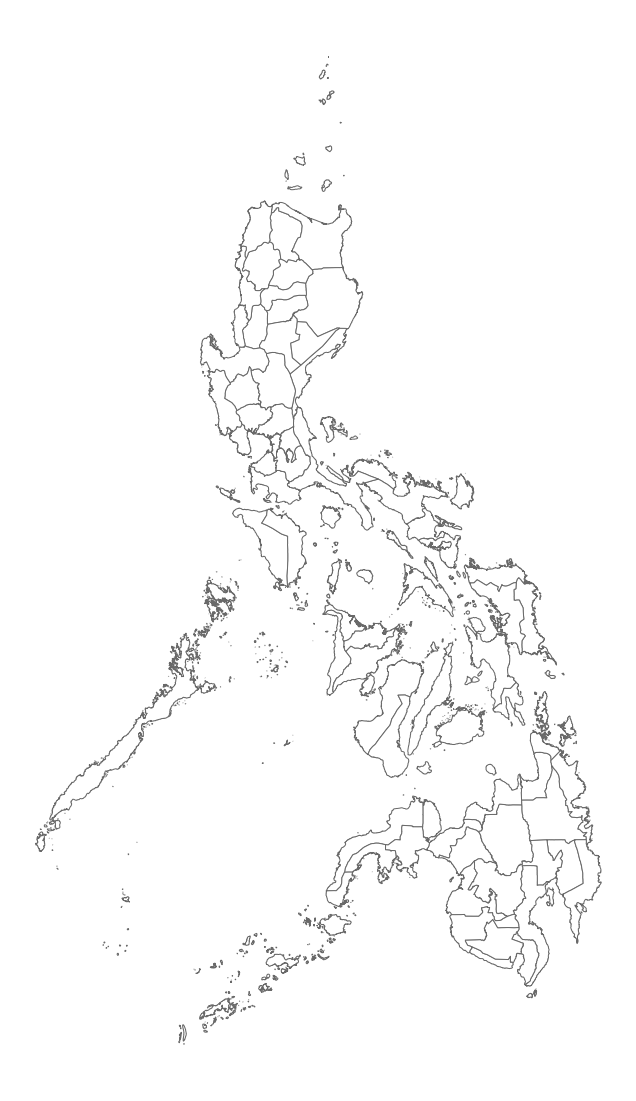

In [5]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [6]:
# Read GeoJSON file
healthsites = gpd.read_file('/content/drive/MyDrive/DATASCI - PH Health Sites/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


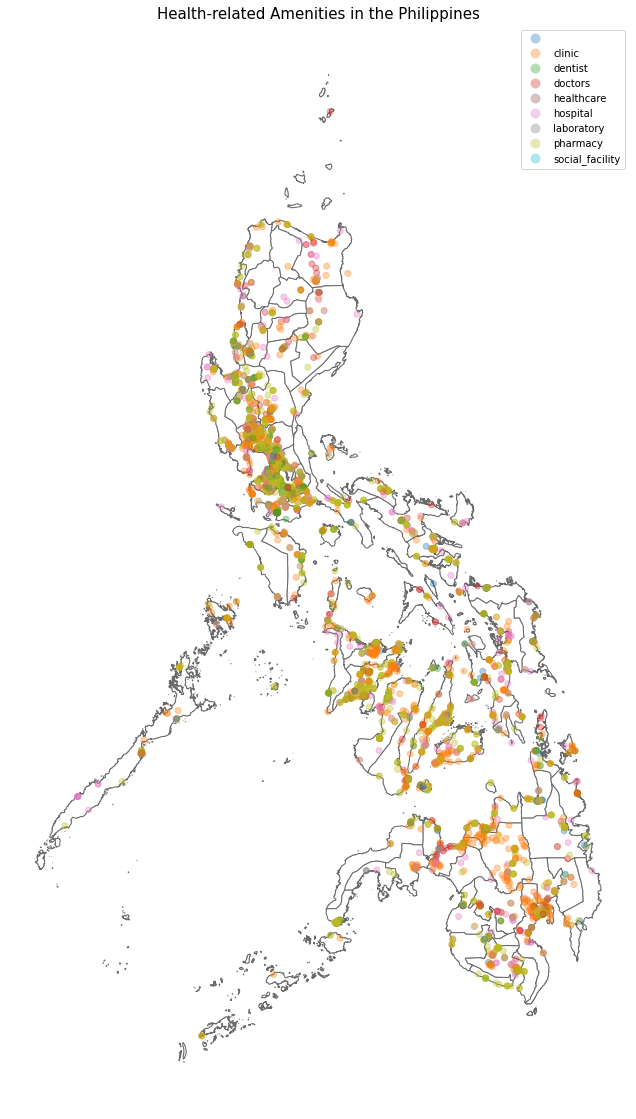

In [7]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [8]:
healthsites.describe(include=np.object)

,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10365,10405,10405,10405,10405,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,10333,2,247,2,80,1,1,3,7953,282,409,432,6592,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,bd26957ae29946f286b30e5d82fa3e1e,,,,,,,,2020-10-16T22:34:26,,,,,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,2,10403,9645,10404,9317,10405,10405,9913,110,10041,8657,8190,935,10404,1904,10327,10399,10404,9647,6405,9330,1,1


# Cavite and Batangas

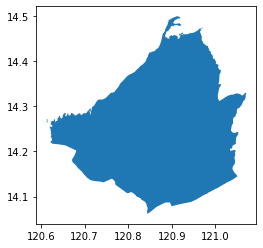

In [9]:
cav_map = ph[ph.NAME_1=="Cavite"]
cav_map.plot()

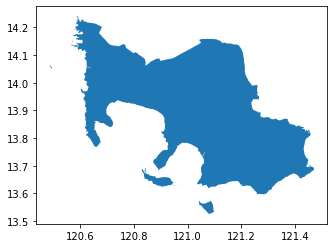

In [10]:
bats_map = ph[ph.NAME_1=="Batangas"]
bats_map.plot()

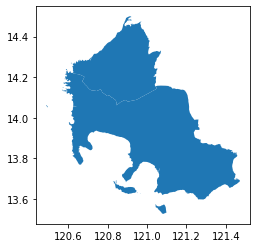

In [11]:
cb_map = ph[(ph.NAME_1=="Cavite") | (ph.NAME_1=="Batangas")]
cb_map.plot()

In [12]:
!pip install pygeos
!pip install rtree

In [13]:
cb_healthsites = gpd.sjoin(healthsites, cb_map, op='intersects')
cb_healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
35,550540215,way,21.0,,pharmacy,,Buhay Na Tubig,,,63294186.0,,,,5c2baf2cdd664645b678cd7e488209a8,,,,,,,2.0,,2018-10-08T03:07:49,,4103,Imus,TGP,,GOwin,,,,,pharmacy,,None,None,"POLYGON ((120.95677 14.40666, 120.95683 14.406...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
43,654204056,node,12.0,,clinic,,,,,18372734.0,,,,be8d452cbf7049a58fe4ffb7d51563d6,,,,,,,6.0,,2013-10-15T17:38:24,,,General Trias,Escuadro Clinic,,pnorman_mechanical,,,,,,,None,None,POINT (120.87874 14.38307),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
54,409903248,way,12.0,,dentist,,,,,41077167.0,,,,f6abc35781884e57939d146ee4bb4068,,,,,,,4.0,,2016-07-28T04:58:03,,4119,Amadeo,,,schadow1,,,,,,,None,None,"POLYGON ((120.92430 14.17193, 120.92443 14.171...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
87,2476861481,node,21.0,,pharmacy,,A. Bonifacio,,,18372734.0,,,,4d18f2535a8148e99ca59bba6cbf701a,,,,,,,3.0,,2013-10-15T17:36:37,,4107,General Trias,Generika,,pnorman_mechanical,,,,no,,,None,None,POINT (120.87932 14.38153),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
95,3785714613,node,12.0,,clinic,,,,,94072691.0,,,,74aa40aa0071470597c9dcb76aa51e8d,,,,,,,2.0,,2020-11-13T16:05:41,,,,AL Santos Medical Clinic,,dasmarinas_mapper,,,,,clinic,,None,None,POINT (120.95754 14.32977),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV


### Plotting

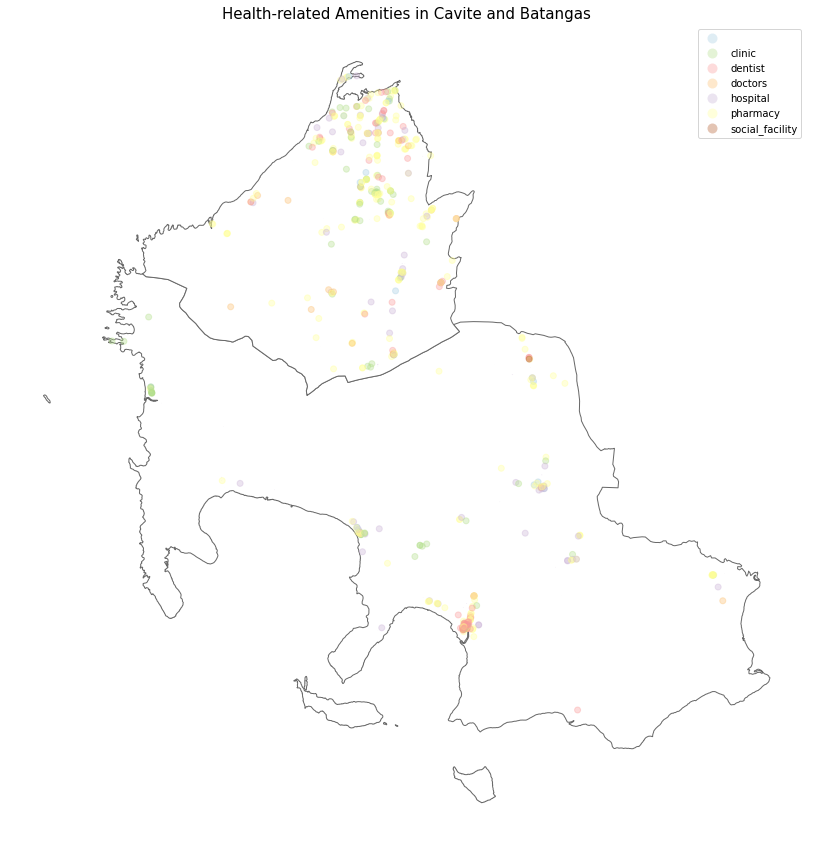

In [14]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

cb_map.plot(ax=ax, color='white', edgecolor='dimgray')
cb_healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title("Health-related Amenities in Cavite and Batangas", fontsize=15)
ax.axis('off');

fig.savefig('/content/drive/MyDrive/DATASCI - PH Health Sites/cavite-batangas amenities')

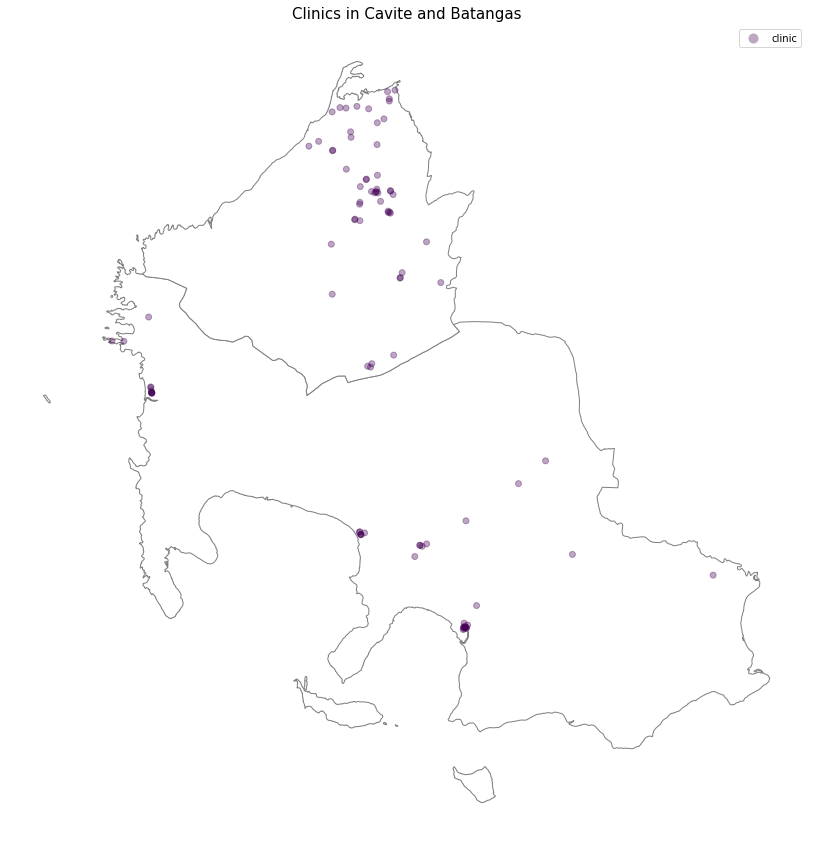

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

cb_map.plot(ax=ax, color='white', edgecolor='gray')
cb_healthsites[cb_healthsites["amenity"] == "clinic"].plot(ax=ax, column="amenity", cmap="viridis", alpha=0.35, legend=True)
ax.set_title('Clinics in Cavite and Batangas', fontsize=15)
ax.axis('off');

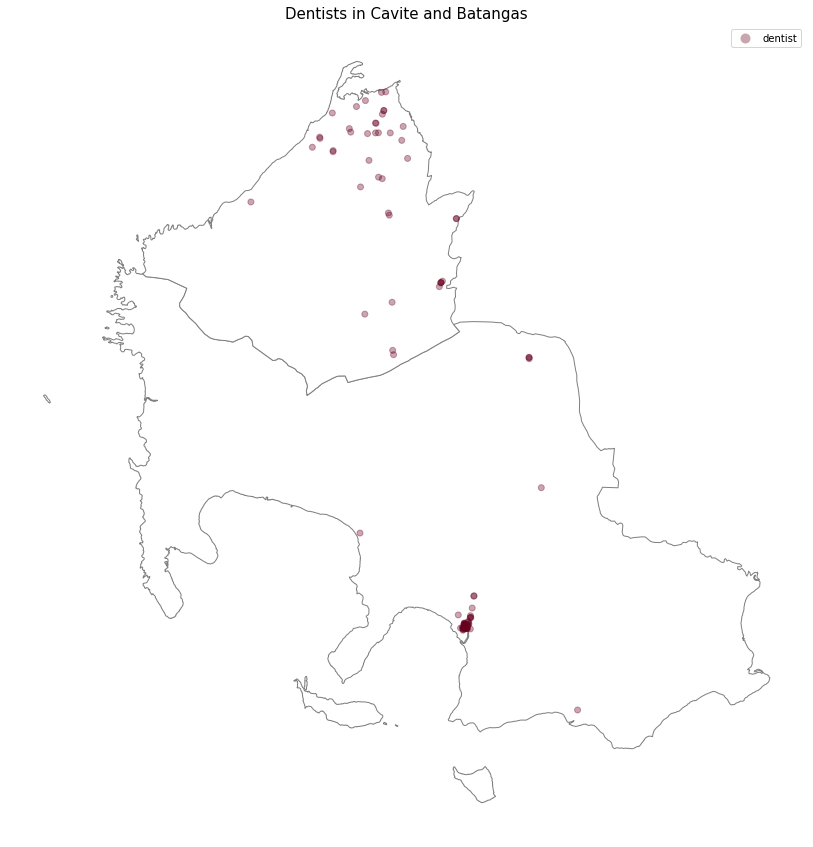

In [16]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

cb_map.plot(ax=ax, color='white', edgecolor='gray')
cb_healthsites[cb_healthsites["amenity"] == "dentist"].plot(ax=ax, column="amenity", cmap="RdBu", alpha=0.35, legend=True)
ax.set_title('Dentists in Cavite and Batangas', fontsize=15)
ax.axis('off');

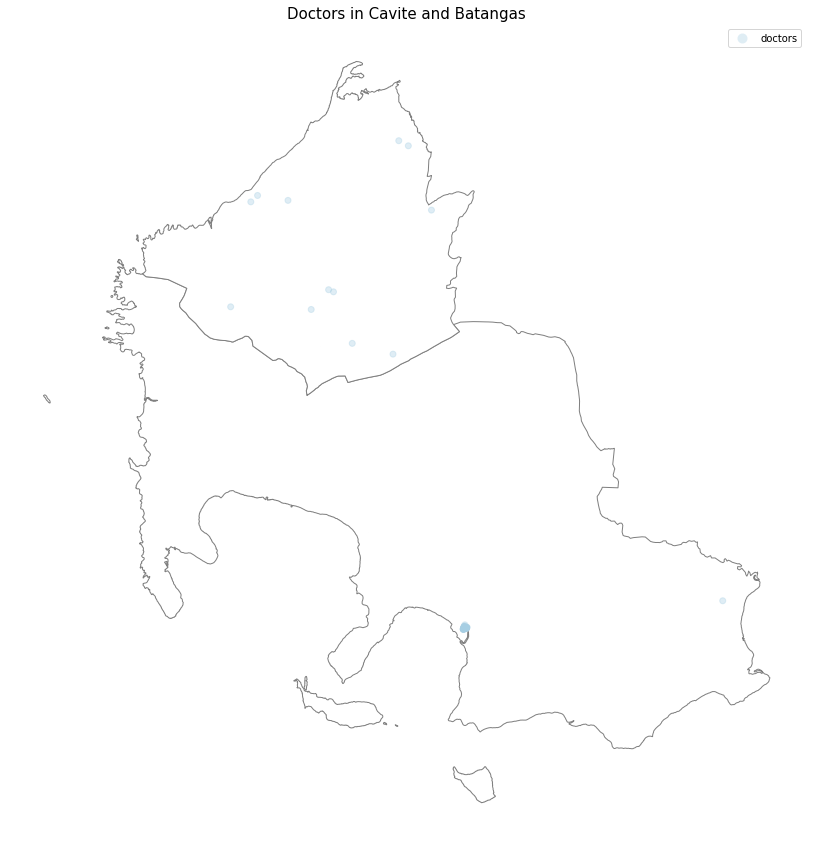

In [17]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

cb_map.plot(ax=ax, color='white', edgecolor='gray')
cb_healthsites[cb_healthsites["amenity"] == "doctors"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in Cavite and Batangas', fontsize=15)
ax.axis('off');

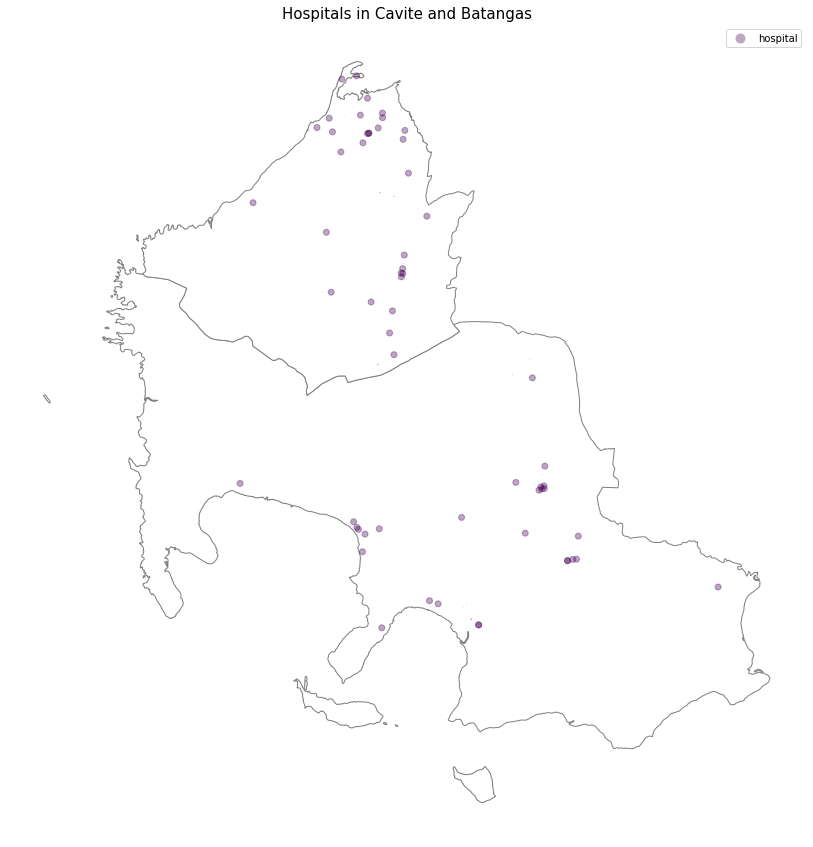

In [18]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

cb_map.plot(ax=ax, color='white', edgecolor='gray')
cb_healthsites[cb_healthsites["amenity"] == "hospital"].plot(ax=ax, column="amenity", cmap="viridis", alpha=0.35, legend=True)
ax.set_title('Hospitals in Cavite and Batangas', fontsize=15)
ax.axis('off');

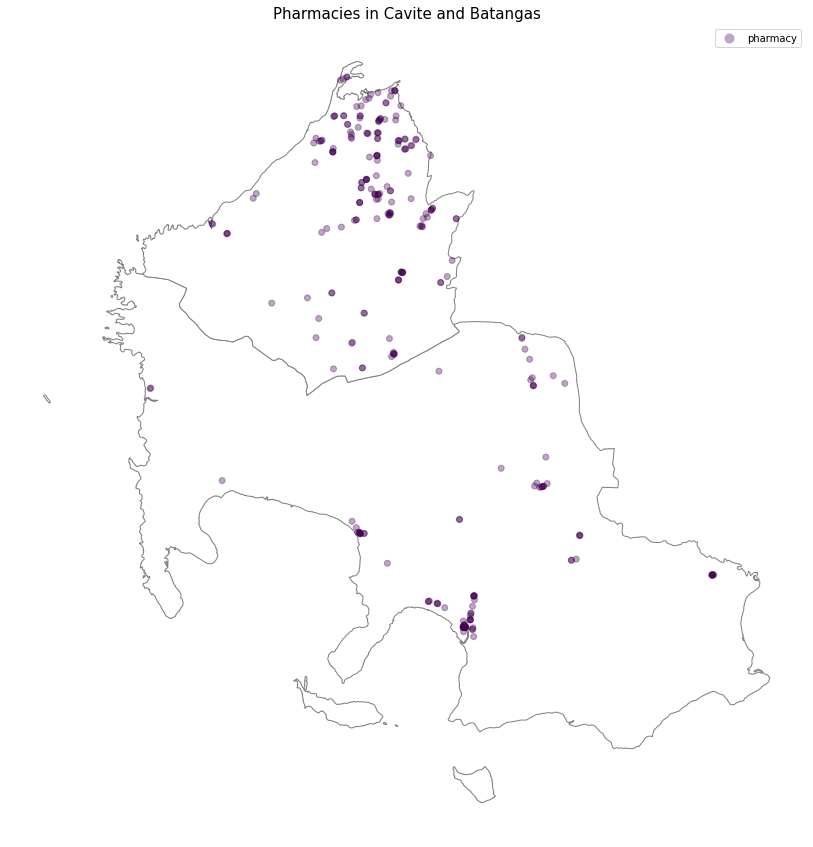

In [19]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

cb_map.plot(ax=ax, color='white', edgecolor='gray')
cb_healthsites[cb_healthsites["amenity"] == "pharmacy"].plot(ax=ax, column="amenity", cmap="viridis", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Cavite and Batangas', fontsize=15)
ax.axis('off');